## NAME: - Rasika Bhandarkavathe

## Task 1: Prediction Using Supervisied ML

In [1]:
#Importing the libararies
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt


In [2]:
#Loading the data
data=pd.read_csv('C:/Users/RK/Desktop/Spark Foundation/Data.csv',header=0)

In [3]:
# See the frist 5 rows
data.head()

,Hours,Score
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
#See the full summary of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Score   25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


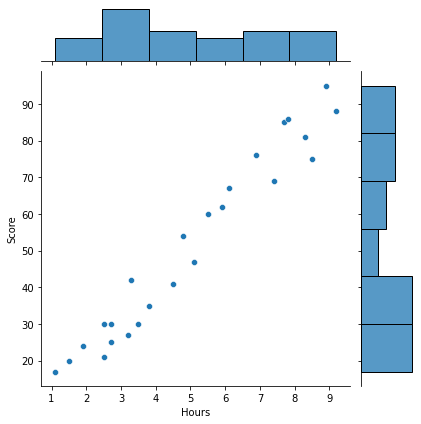

In [5]:
sns.jointplot(x="Hours",y="Score",data=data)

### From the above graph, we can see that there is a positive linear relationship between the Hours and Score.

## splitting into train and test data

In [20]:
X=data[['Hours']]

In [7]:
y=data['Score']

In [8]:
#Importing train_test_split libarary and using these we can spliting our data into 80:20 rule
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.2)

In [9]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(20, 1) (5, 1) (20,) (5,)


## Training the Model

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
lm=LinearRegression()

In [12]:
lm.fit(X_train,y_train)

LinearRegression()

In [13]:
#B0 is intercept and B1 is slope of line
print("B0=",lm.intercept_,"\nB1=",lm.coef_)

B0= 2.018160041434683 
B1= [9.91065648]


### Here the coeff. of constant is 2.0182 and coeff. of hours is 9.9107.

In [14]:
#Plotting the Regression Line
y0=lm.intercept_+lm.coef_*X_train

Text(0, 0.5, 'Score')

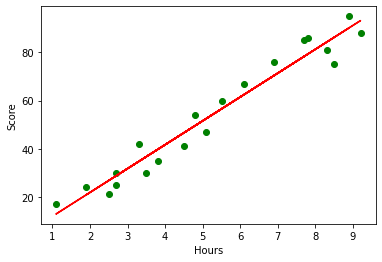

In [15]:
#Plotting on train data
plt.scatter(X_train,y_train,color="green")
plt.plot(X_train,y0,color="red")
plt.xlabel("Hours")
plt.ylabel("Score")

## Percentage of student based on the number of study hours

### Making Predictions on test data :-

In [16]:
#Predicting the scores of test data
y_predict=lm.predict(X_test)
y_predict

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [17]:
#Comparing Actual VS Predicted Scores
Actual=list(y_test)
Predicted=list(y_predict)
table=pd.DataFrame({'Actual':Actual,'Predicted':Predicted})
table

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## Evaluating of The Model

In [18]:
#Importing metrics from sklearn
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
#To find MSE,RMSE,r2
mse=mean_absolute_error(y_test,y_predict)
print("MSE:",mse)
rmse=np.sqrt(mean_squared_error(y_test,y_predict))
print("RMSE:",rmse)
r2=r2_score(y_test,y_predict)
print("R-Square:",r2)

MSE: 4.183859899002975
RMSE: 4.6474476121003665
R-Square: 0.9454906892105356


### Accuracy of our model is 94% it indicates that the given model is good model. The mean absolute error is 4.1838. 

## predicted score of a student studies for 9.25 hrs/ day

In [19]:
lm.predict([[9.25]])

array([93.69173249])

### Here, if student studies for 9.25 hrs/days then student will get 93.6917% score.